# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [1]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [23]:
#acquire data
df = pd.read_csv('student_grades.csv')

In [4]:
#look at your data!
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95.0,96
1,2,98.0,93,96.0,95
2,3,85.0,83,87.0,87
3,4,83.0,80,86.0,85
4,5,93.0,90,96.0,97


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    float64
 4   final_grade  104 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.2 KB


In [18]:
#drop nulls
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    float64
 4   final_grade  102 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.8 KB


In [21]:
#convert everythiing to int
df = df.astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


Now our data is free of nulls and in the optimal dtype. Now to split the df

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#split into train, val, test
train_val, test = train_test_split(df,
                                  train_size = 0.8,
                                  random_state = 1349)
train, validate = train_test_split(train_val,
                                  train_size = 0.7,
                                  random_state = 1349)

In [26]:
train.shape, validate.shape, test.shape

((58, 5), (25, 5), (21, 5))

In [27]:
columns = train.drop(columns= ['final_grade', 'student_id']).columns.to_list()

In [28]:
train_scaled = train.copy()

In [29]:
from sklearn.preprocessing import MinMaxScaler
train_scaled = MinMaxScaler().fit_transform(train.drop(
    columns= ['final_grade', 'student_id']))

In [31]:
# make an x train and y train from our train dataset
# x is the columns we want to observe
# y is the target variable
X_train, y_train = train[columns], train[['final_grade']]

In [32]:
X_train.head()

,exam1,exam2,exam3
90,70.0,75,78.0
15,85.0,83,87.0
55,83.0,80,86.0
75,58.0,65,70.0
25,70.0,75,78.0


In [38]:
#verify student_id is unique 
(train.student_id.value_counts() > 1).sum()

0

#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

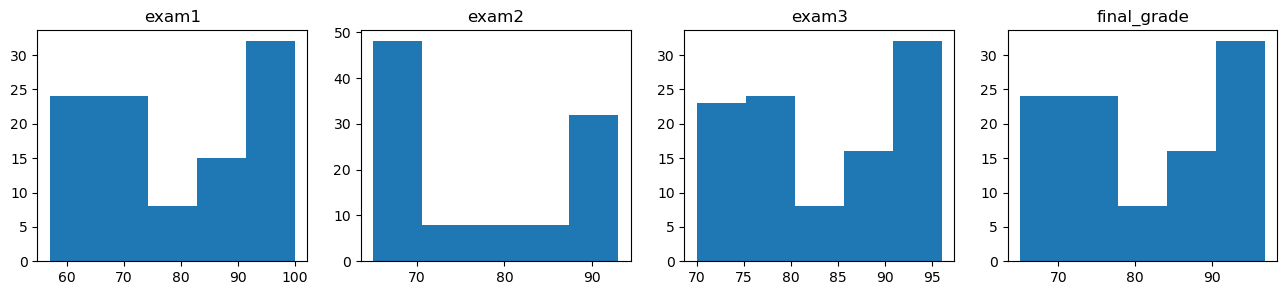

In [39]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

### What must we do before exploring relationships? 

In [40]:
#train, validate, test split

## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - histogram
        - boxplot
        - displot
    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot
    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot
        
    - Discrete with Discrete
        - heatmap

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between exam1 and final grade? 

- both of my variables are continious
- check for correlation

### Hypothesis

- ${H_0}$: there is no ordinal correlation between exam1 and final_grade
- ${H_a}$:  there is an ordinal correlation between exam1 and final_grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [41]:
train.columns

Index(['student_id', 'exam1', 'exam2', 'exam3', 'final_grade'], dtype='object')

In [42]:
# create the correlation matrix using pandas .corr()
exam_corr = train.drop(columns = 'student_id').corr(method = 'spearman')

In [43]:
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.916066,0.897337,0.967401
exam2,0.916066,1.000000,0.920229,0.874022
exam3,0.897337,0.920229,1.000000,0.926075
final_grade,0.967401,0.874022,0.926075,1.000000


<AxesSubplot:>

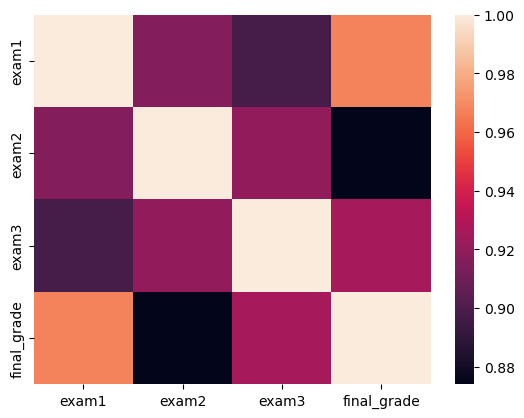

In [44]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)

In [45]:
np.triu(exam_corr)

array([[1.        , 0.91606623, 0.8973369 , 0.96740132],
       [0.        , 1.        , 0.9202292 , 0.87402175],
       [0.        , 0.        , 1.        , 0.92607451],
       [0.        , 0.        , 0.        , 1.        ]])

<AxesSubplot:>

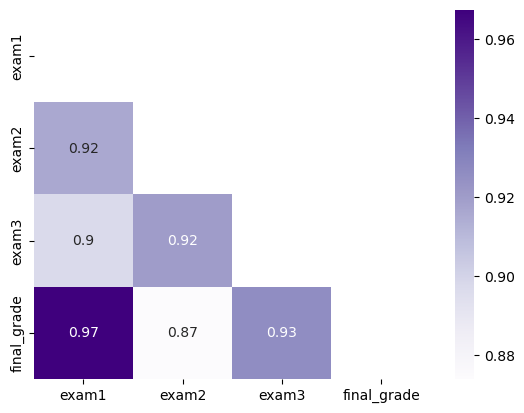

In [48]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(exam_corr,
            cmap='Purples',
            annot=True,
           mask = np.triu(exam_corr))

### Unpacking **kwargs 

<AxesSubplot:>

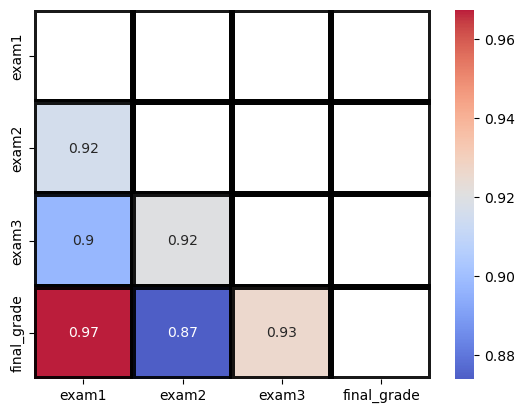

In [49]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}
sns.heatmap(exam_corr,
           cmap='coolwarm',
           annot=True,
           mask=np.triu(exam_corr),
           **kwargs)

### Test Hypothesis

In [70]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train.exam1, train.final_grade)
print(f'Correlation Coefficient: {r}\nP-value: {p}')

Correlation Coefficient: nan
P-value: nan


In [ ]:
if p < 

#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

In [ ]:
#if big dataset: remember, df.sample(some_number)

<function matplotlib.pyplot.show(close=None, block=None)>

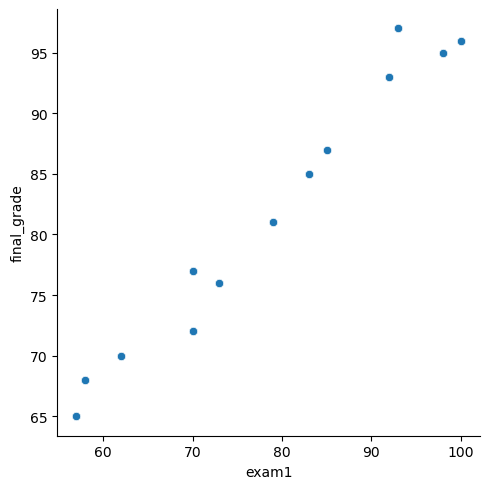

In [52]:
sns.relplot(data=train,
          x='exam1',
          y='final_grade')
plt.show

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

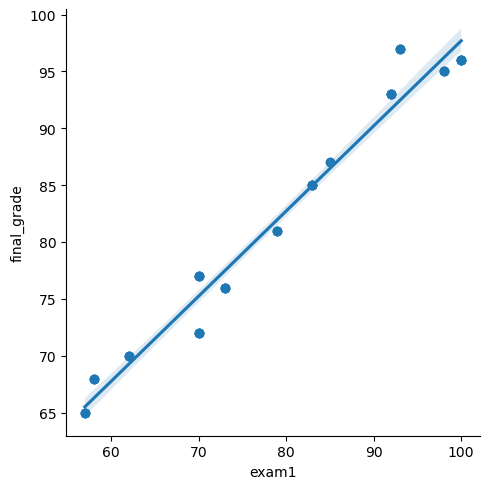

In [53]:
# I can really pop that line color if I want
sns.lmplot(data=train,
          x='exam1',
          y='final_grade')

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

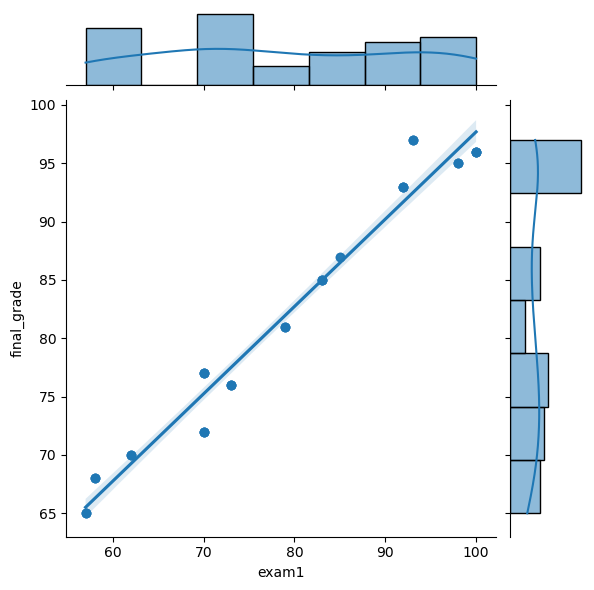

In [57]:
sns.jointplot(data=train,
          x='exam1',
          y='final_grade',
        kind='reg')

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

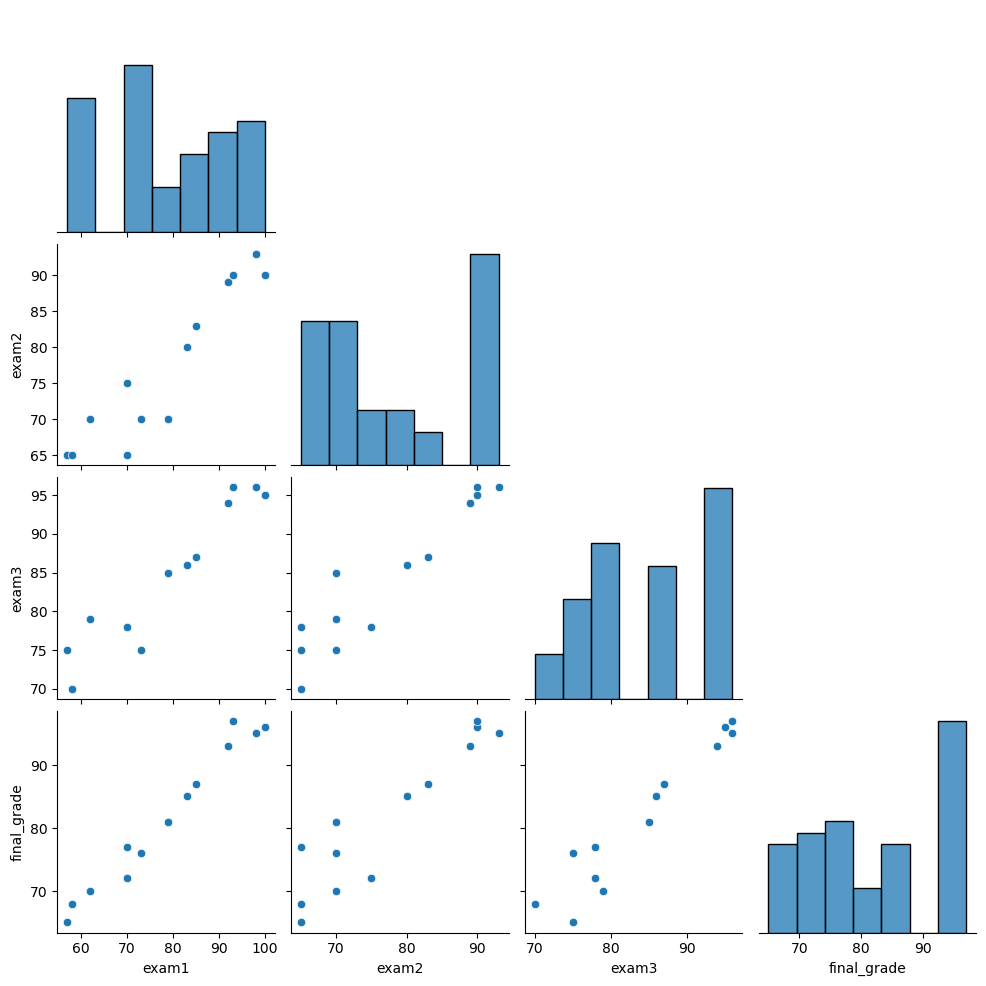

In [71]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(train[['exam1', 'exam2', 'exam3', 'final_grade']], corner=True)
plt.show()

Takeways
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [58]:
#number of people who failed each test
#how do we define failing?
# we will use standard 70 cutoff

In [62]:
for col in train.drop(columns='student_id').columns:
    num = (train[col] < 70).sum()
    total = len(train)
    print(f'{num} out of {total} students failed {col}')

12 out of 58 students failed exam1
13 out of 58 students failed exam2
0 out of 58 students failed exam3
8 out of 58 students failed final_grade


### Make categorical values for further exploration

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
#assign fail and pass for each test
for col in train.drop(columns='student_id').columns:
    train[f'passed_{col}'] = np.where(train[col] >= 70, 1, 0)

In [ ]:
train

### Whats the relationship between passing exam1 and the final_exam grade?

In [ ]:
#seaborn histplot 
plt.figure(figsize = (14,9))
sns.histplot
plt.vlines(70, 0, 16)

In [68]:
#mean final_grade by exam1 pass/fail status
train.groupby('passed_exam1').final_grade.mean()

passed_exam1
0    69.153846
1    85.711111
Name: final_grade, dtype: float64

### What percentage of students failed exam1 and the final?

In [67]:
(train['passed_exam1'] == 0).sum()/len(train) * 100

22.413793103448278

### Of the students who failed exam1, how many also failed the final?

In [ ]:
#create subset of people who failed exam1


In [ ]:
#how many failed final


In [ ]:
#percentage who failed final


### Of the students who failed exam2, how many also failed the final?

In [72]:
#create subset of people who failed exam2
subset = train[train.passed_exam2 == 0]

In [73]:
#how many failed final
(subset.final_grade < 70).sum()

8

### Of the students who failed both exam1 and exam2, how many also failed the final?

In [76]:
#create subset of people who failed exam2
subset = train[(train.exam1 < 70) & (train.exam2 < 70)]

In [78]:
#how many failed final
(subset.final_grade < 70).sum()

8

In [ ]:
#percentage who failed final


#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- if i had time, we could create a new feature that captures if a student failed both exam1 and exam2 